# Objetivo

El objetivo de este notebook es realizar un modelado simple usando la información de las publicaciones del site de MercadoLibre para predecir, dada una publicación, la cantidad de items vendidos.

El dataset para dicho análisis se obtiene corriendo el notebook "modelado_generacion_datos". 

Es importante notar que se tomó en cuenta sólo el site de Argentina y sólo las publicaciones bajo la categoría "Celulares y Teléfonos". Se tomaron 1000 publicaciones por cada una de las subcategorías de la categoría "Celulares y Teléfonos". 

Al ser un modelado simple, es razonable encontrar múltiples puntos de mejora y/o profundización.

# Índice

* [1 - Imports](#1)
* [2 - Recolección de datos](#2)
* [3 - Procesamiento de los datos obtenidos](#3)
    * [3.1 - Variables numéricas](#3.1)
        * [3.1.1 - Price](#3.1.1)
        * [3.1.2 - Original price](#3.1.2)
    * [3.2 - Variables categóricas](#3.2)
        * [3.2.1 - Categoría principal](#3.2.1)
        * [3.2.2 - Category id](#3.2.2)
        * [3.2.3 - Adress state name](#3.2.3)
        * [3.2.4 - Free Shipping](#3.2.4)
        * [3.2.5 - Store pick up](#3.2.5)
        * [3.2.6 - Official store id](#3.2.6)
        * [3.2.7 - Accepts mercadopago](#3.2.7)
        * [3.2.8 - Buying mode](#3.2.8)
        * [3.2.9 - Marca](#3.2.9)
        * [3.2.10 - Modelo](#3.2.10)
        * [3.2.11 - Condition](#3.2.11)
        * [3.2.12 - Title](#3.2.12)
        * [3.2.13 - Sold quantity](#3.2.13)
        * [3.2.14 - Available quantity](#3.2.14)
        * [3.2.15 - Power seller status](#3.2.15)
        * [3.2.16 - Tags](#3.2.16)
* [4 - Creación de variables](#4)
    * [4.1 - Variables de precio y descuento](#4.1)
    * [4.2 - Tienda oficial](#4.2)
    * [4.3 - Rango items vendidos](#4.3)
    * [4.4 - Rango stock](#4.4)
    * [4.5 - Subcategoría](#4.5)
    * [4.6 - Zona agrupada](#4.6)
    * [4.7 - Rango items vendidos (Variable Target)](#4.7)
    * [4.8 - Variables de tags](#4.8)
    * [4.9 - Es eshop](#4.9)
    * [4.10 - Renombramos algunas variables y nos quedamos sólo con las variables de interés](#4.10)
* [5 - Relación entre las variables y la variable Target](#5)
    * [5.1 - Variables Numéricas](#5.1)
        * [5.1.1 - precio_sin_dcto vs rango_items_vendidos](#5.1.1)
        * [5.1.2 - precio_sin_dcto vs rango_items_vendidos](#5.1.2)
        * [5.1.3 - dcto_nominal vs rango_items_vendidos](#5.1.3)
        * [5.1.4 - dcto_porcentual vs rango_items_vendidos](#5.1.4)
    * [5.2 - Variables Categóricas](#5.2)
        * [5.2.1 - tiene_dcto vs rango_items_vendidos](#5.2.1)
        * [5.2.2 - tiene_envio_gratis vs rango_items_vendidos](#5.2.2)
        * [5.2.3 - es_tienda_oficial vs rango_items_vendidos](#5.2.3)
        * [5.2.4 - tiene_retiro_local vs rango_items_vendidos](#5.2.4)
        * [5.2.5 - acepta_mercadopago vs rango_items_vendidos](#5.2.5)
        * [5.2.6 - es_eshop vs rango_items_vendidos](#5.2.6)
        * [5.2.7 - tag_brand_verified vs rango_items_vendidos](#5.2.7)
        * [5.2.8 - tag_cart_eligible vs rango_items_vendidos](#5.2.8)
        * [5.2.9 - tag_shipping_guaranteed vs rango_items_vendidos](#5.2.9)
        * [5.2.10 - tag_good_quality_picture vs rango_items_vendidos](#5.2.10)
        * [5.2.11 - tag_good_quality_thumbnail vs rango_items_vendidos](#5.2.11) 
        * [5.2.12 - tag_dragged_bids_and_visits vs rango_items_vendidos](#5.2.12) 
        * [5.2.13 - tag_loyalty_discount_eligible vs rango_items_vendidos](#5.2.13) 
        * [5.2.14 - tag_extended_warranty_eligible vs rango_items_vendidos](#5.2.14) 
        * [5.2.15 - tag_incomplete_technical_specs vs rango_items_vendidos](#5.2.15) 
        * [5.2.16 - modo_compra vs rango_items_vendidos](#5.2.16) 
        * [5.2.17 - condicion vs rango_items_vendidos](#5.2.17) 
        * [5.2.18 - rango_stock vs rango_items_vendidos](#5.2.18) 
        * [5.2.19 - zona_agrupada vs rango_items_vendidos](#5.2.19) 
        * [5.2.20 - status_vendedor vs rango_items_vendidos](#5.2.20) 
        * [5.2.21 - listing_type_id vs rango_items_vendidos](#5.2.21)       
* [6 - Encode de variables](#6)
* [7 - Train-Validation split](#7)
* [8 - Métrica de evaluación](#8)
* [9 - Construcción de los modelos](#9)
* [10 - Evaluación y resultados](#10)
    * [10.1 - Evaluación del mejor modelo obtenido](#10.1)
    * [10.2 - Definición y evaluación del modelo baseline](#10.2)
    * [10.3 - Mejor modelo obtenido versus modelo baseline](#10.3)
    * [10.4 - Feature importances](#10.4)
* [11 - Próximos pasos / ideas de mejoras](#11)

# 1 - Imports <a id="1"></a>

In [4]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt  
import matplotlib.pylab as pylab
import seaborn as sns 

from funciones import request_a_diccionario, analizar_nulos, calcular_precio_sin_dcto
from funciones import calcular_dcto_porcentual, generar_df_metricas, generar_df_resultados_tuneo
from funciones import generar_df_para_grafico_comparacion_modelos, graficar_comparacion_modelos
from funciones import generar_df_feature_importances, graficar_feature_importances

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
    
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import pickle

import time
from time import process_time

from ast import literal_eval #para poder leer columnas cuyos elementos son listas

#### Seteamos algunas configuraciones

In [5]:
pd.set_option('display.max_columns', 1000) # Show all columns when looking at dataframe
pd.set_option('display.max_rows', 1000) # Show all rows when looking at dataframe
pd.set_option('display.max_colwidth', 100000)

pylab.rcParams['figure.figsize'] = 12,8
sns.set_style('darkgrid')

seed = 42 # seteamos la semilla para funciones que usen random_state

# 2 - Recolección de datos <a id="2"></a>

### NOTA: Sólo vamos a traer datos para ARGENTINA, para la categoría "Celulares y Teléfonos".

#### Traemos todas las categorías que hay

In [6]:
categorias_all = request_a_diccionario("https://api.mercadolibre.com/sites/MLA/categories/all")

In [7]:
dicc_categorias_all = {}
for key in categorias_all.keys():
    item = categorias_all[key]
    categoria_id = item["id"]
    categoria_name = item["name"]
    dicc_categorias_all[categoria_id] = categoria_name

#### Levantamos el csv generado por el notebook "analisis_generacion_datos"

In [8]:
# Es importante setear el parámetro converters para poder leer los elementos de la columna tags como listas 
df_total = pd.read_csv("df_total_original.csv", converters={"tags": literal_eval})

#### Corroboramos el tamaño del dataset obtenido

In [9]:
print("Tamaño total:", len(df_total))

Tamaño total: 57946


# 3 - Procesamiento de los datos obtenidos <a id="3"></a>

Vamos a tratar cada uno de los campos (o variables) de interés.

Para cada variable, haremos:

- Breve descripción de la variable.

- Análisis de datos nulos o faltantes (imputaremos si es necesario).

- Tipo de dato (entero, float, boolean, object), y haremos un cast si es necesario.

- Distribución de los valores de la variable

#### Nos quedamos con las variables que nos interesan

In [10]:
columnas_de_interes = ['price', "original_price",
                       "category_id",
                      'address__state_name',
                      'shipping__free_shipping', 'official_store_id', 'shipping__store_pick_up',
                      'accepts_mercadopago', 'buying_mode',
                      'attributes__marca', 'attributes__modelo', 'title', 'condition',
                      "sold_quantity", "available_quantity",
                      "listing_type_id", "seller__power_seller_status", "seller__car_dealer",
                      "seller__eshop__eshop_experience", "seller__eshop__eshop_id", "tags"]

In [11]:
df_total = df_total[columnas_de_interes]

In [12]:
df_total.head(2)

,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
0,19990.0,NaN,MLA1055,Capital Federal,1.0,NaN,0.0,1.0,buy_it_now,Motorola,E6 Play,Moto E6 Play 32 Gb Ocean Blue 2 Gb Ram,new,5.0,50.0,gold_special,silver,0.0,NaN,NaN,"[loyalty_discount_eligible, brand_verified, extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, immediate_payment, cart_eligible, shipping_guaranteed]"
1,25999.0,36999.0,MLA1055,Capital Federal,1.0,NaN,0.0,1.0,buy_it_now,Motorola,G8 Play,Moto G8 Play 32 Gb Knight Gray 2 Gb Ram,new,200.0,1.0,gold_special,platinum,0.0,0.0,162995.0,"[brand_verified, extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, immediate_payment, shipping_guaranteed]"


## 3.1 - Variables numéricas <a id="3.1"></a>

### 3.1.1 - Price <a id="3.1.1"></a>

In [13]:
variable = "price"

#### Descripción de la variable

- Si la publicación tiene descuento, esta variable es el precio con descuento.
- Si la publicación no tiene descuento, esta variable es el precio de la publicación.

#### Análisis de registros nulos.

In [14]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable price tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


Cuando este valor viene nulo, es porque la publicación tiene precio a convenir.

#### Análisis del tipo de dato

In [15]:
df_total[variable].dtypes

dtype('float64')

#### Distribución de la variable

In [16]:
df_total[variable].describe(percentiles = [.25, .5, .75, .9])

count    5.794600e+04
mean     8.371653e+03
std      6.279714e+04
min      2.200000e+01
25%      4.170000e+02
50%      1.099000e+03
75%      3.190000e+03
90%      1.022725e+04
max      1.050000e+07
Name: price, dtype: float64

Chequeé y los valores altos y no los voy a considerar como outliers porque son precios reales!

### 3.1.2 - Original price <a id="3.1.2"></a>

In [17]:
variable = "original_price"

#### Descripción de la variable

- Si la publicación tiene descuento, esta variable es el precio sin descuento.
- Si la publicación no tiene descuento, esta variable queda nula.

#### Análisis de registros nulos.

In [18]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable original_price tiene 57254 registros nulos (que representan un 98.81 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
0,19990.0,NaN,MLA1055,Capital Federal,1.0,NaN,0.0,1.0,buy_it_now,Motorola,E6 Play,Moto E6 Play 32 Gb Ocean Blue 2 Gb Ram,new,5.0,50.0,gold_special,silver,0.0,NaN,NaN,"[loyalty_discount_eligible, brand_verified, extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, immediate_payment, cart_eligible, shipping_guaranteed]"
2,10999.0,NaN,MLA1055,Buenos Aires,1.0,NaN,0.0,1.0,buy_it_now,LG,K9,LG K9 16 Gb Aurora Black 2 Gb Ram,new,150.0,250.0,gold_special,NaN,0.0,NaN,NaN,"[extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, brand_verified, immediate_payment, cart_eligible, shipping_guaranteed]"


No imputamos los nulos porque más tarde vamos a generar variables basándonos en esos nulos.

#### Análisis del tipo de dato

In [19]:
df_total[variable].dtypes

dtype('float64')

#### Distribución de la variable

Esta distribución nos dice cómo se distribuye el precio original de las publicaciones con descuento.

In [20]:
df_total[variable].describe(percentiles = [.25, .5, .75, .9])

count      692.000000
mean      7986.146445
std      12638.823300
min         75.000000
25%       1149.750000
50%       3624.500000
75%       7522.275000
90%      23999.900000
max      88104.000000
Name: original_price, dtype: float64

## 3.2 - Variables categóricas <a id="3.2"></a>

### 3.2.1 - Categoría principal <a id="3.2.1"></a>

En este caso no la vamos a tener en cuenta, ya que la categoría principal siempre será "Celulares y Teléfonos"

### 3.2.2 - Category id <a id="3.2.2"></a>

In [21]:
variable = "category_id"

#### Descripción de la variable

Id de la subcategoría de la publicación. (Es la subcategoría "hoja").

#### Análisis de registros nulos.

In [22]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable category_id tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [23]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [24]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de category_id


MLA429749    1.770614
MLA429731    1.758534
MLA70411     1.739551
MLA10626     1.734373
MLA48603     1.734373
MLA5824      1.729196
MLA5337      1.729196
MLA5338      1.727470
MLA61294     1.727470
MLA7039      1.727470
MLA5549      1.727470
MLA11860     1.727470
MLA15641     1.727470
MLA70345     1.727470
MLA10193     1.727470
MLA10617     1.727470
MLA401278    1.725745
MLA1915      1.725745
MLA47540     1.725745
MLA433156    1.725745
MLA407977    1.725745
MLA95146     1.725745
MLA10675     1.725745
MLA407978    1.706761
MLA3518      1.691230
MLA10656     1.691230
MLA2906      1.641183
MLA3529      1.641183
MLA13459     1.641183
MLA7033      1.639457
MLA11421     1.620474
MLA48605     1.558347
MLA1055      1.546267
MLA352679    1.534187
MLA417678    1.470334
MLA39121     1.470334
MLA2911      1.468609
MLA3514      1.434094
MLA9210      1.423739
MLA417313    1.335726
MLA70452     1.297760
MLA432023    1.296034
MLA420040    1.197667
MLA9467      1.195941
MLA37201     1.187312
MLA39210  

### 3.2.3 - Address state name <a id="3.2.3"></a>

In [25]:
variable = "address__state_name"

#### Descripción de la variable

Zona o provincia de la publicación.

#### Análisis de registros nulos.

In [26]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable address__state_name tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [27]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [28]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

Porcentaje de registros según categoría de address__state_name


Buenos Aires           25.589342
Capital Federal        61.990474
Catamarca               0.022435
Chaco                   0.067304
Chubut                  0.136334
Corrientes              0.139785
Córdoba                 4.956339
Entre Ríos              0.352052
Formosa                 0.043144
Jujuy                   0.106996
La Pampa                0.072481
La Rioja                0.025886
Mendoza                 0.723087
Misiones                0.134608
Neuquén                 0.153591
Río Negro               0.148414
Salta                   0.117351
San Juan                0.065578
San Luis                0.081110
Santa Cruz              0.063853
Santa Fe                4.008905
Santiago del Estero     0.503917
Tierra del Fuego        0.003451
Tucumán                 0.493563
Name: address__state_name, dtype: float64

#### Corregimos algunos de los datos:

In [29]:
df_total[variable].replace({"Bs.as. Costa Atlántica":"Bs.As. Costa Atlántica", 
                            "Bs.as. G.b.a. Norte":"Bs.As. G.B.A. Norte", 
                            "Bs.as. G.b.a. Oeste":"Bs.As. G.B.A. Oeste",
                            "Bs.as. G.b.a. Sur":"Bs.As. G.B.A. Sur",
                            "Buenos Aires Interior":"Buenos Aires",
                            "Tierra Del Fuego":"Tierra del Fuego"}, 
                           inplace = True)

df_total = df_total[~(df_total[variable].isin(["Brasil", "Uruguay"]))]

In [30]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

Porcentaje de registros según categoría de address__state_name


Buenos Aires           25.589342
Capital Federal        61.990474
Catamarca               0.022435
Chaco                   0.067304
Chubut                  0.136334
Corrientes              0.139785
Córdoba                 4.956339
Entre Ríos              0.352052
Formosa                 0.043144
Jujuy                   0.106996
La Pampa                0.072481
La Rioja                0.025886
Mendoza                 0.723087
Misiones                0.134608
Neuquén                 0.153591
Río Negro               0.148414
Salta                   0.117351
San Juan                0.065578
San Luis                0.081110
Santa Cruz              0.063853
Santa Fe                4.008905
Santiago del Estero     0.503917
Tierra del Fuego        0.003451
Tucumán                 0.493563
Name: address__state_name, dtype: float64

### 3.2.4 - Free shipping <a id="3.2.4"></a>

In [31]:
variable = "shipping__free_shipping"

#### Descripción de la variable

1 si la publicación tiene envío gratis, 0 caso contrario.

#### Análisis de registros nulos.

In [32]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable shipping__free_shipping tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [33]:
df_total[variable].dtypes

dtype('float64')

Lo vamos a cambiar a int:

In [34]:
df_total = df_total.astype({variable: "int"})

#### Distribución de la variable

In [35]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de shipping__free_shipping


0    70.981604
1    29.018396
Name: shipping__free_shipping, dtype: float64

### 3.2.5 - Store pick up <a id="3.2.5"></a>

In [36]:
variable = "shipping__store_pick_up"

#### Descripción de la variable

1 si la publicación permite retiro por el local, 0 caso contrario.

#### Análisis de registros nulos.

In [37]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable shipping__store_pick_up tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [38]:
df_total[variable].dtypes

dtype('float64')

Lo vamos a cambiar a int:

In [39]:
df_total = df_total.astype({variable: "int"})

#### Distribución de la variable

In [40]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de shipping__store_pick_up


0    99.78083
1     0.21917
Name: shipping__store_pick_up, dtype: float64

Esto tiene que ver una decisión de MeLi de pushear Mercado Envíos???

### 3.2.6 - Official store id <a id="3.2.6"></a>

In [41]:
variable = "official_store_id"

#### Descripción de la variable

Id de la tienda oficial. Si no es tienda oficial, viene nulo.

#### Análisis de registros nulos.

In [42]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable official_store_id tiene 57304 registros nulos (que representan un 98.89 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
0,19990.0,NaN,MLA1055,Capital Federal,1,NaN,0,1.0,buy_it_now,Motorola,E6 Play,Moto E6 Play 32 Gb Ocean Blue 2 Gb Ram,new,5.0,50.0,gold_special,silver,0.0,NaN,NaN,"[loyalty_discount_eligible, brand_verified, extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, immediate_payment, cart_eligible, shipping_guaranteed]"
1,25999.0,36999.0,MLA1055,Capital Federal,1,NaN,0,1.0,buy_it_now,Motorola,G8 Play,Moto G8 Play 32 Gb Knight Gray 2 Gb Ram,new,200.0,1.0,gold_special,platinum,0.0,0.0,162995.0,"[brand_verified, extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, immediate_payment, shipping_guaranteed]"


En este caso no vamos a imputar los nulos porque vamos a crear una nueva variable más adelante.

#### Análisis del tipo de dato

In [43]:
df_total[variable].dtypes

dtype('float64')

#### Distribución de la variable

In [44]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de official_store_id


NaN        98.892072
 997.0      0.213992
 1218.0     0.091464
 945.0      0.072481
 998.0      0.063853
 1580.0     0.051772
 1868.0     0.046595
 2141.0     0.043144
 1179.0     0.036241
 1141.0     0.025886
 1760.0     0.022435
 82.0       0.022435
 367.0      0.020709
 1938.0     0.017257
 251.0      0.013806
 1425.0     0.013806
 1949.0     0.013806
 1219.0     0.013806
 1762.0     0.012080
 1372.0     0.012080
 827.0      0.012080
 490.0      0.012080
 1450.0     0.012080
 445.0      0.012080
 1645.0     0.012080
 1421.0     0.012080
 1759.0     0.012080
 1256.0     0.012080
 1416.0     0.010354
 159.0      0.010354
 597.0      0.010354
 1255.0     0.008629
 947.0      0.008629
 144.0      0.008629
 391.0      0.006903
 1618.0     0.006903
 370.0      0.006903
 1417.0     0.006903
 2003.0     0.006903
 2004.0     0.005177
 2012.0     0.005177
 1407.0     0.005177
 1355.0     0.005177
 1686.0     0.005177
 1360.0     0.005177
 410.0      0.005177
 1485.0     0.003451
 47.0       0

### 3.2.7 - Accepts mercadopago <a id="3.2.7"></a>

In [45]:
variable = "accepts_mercadopago"

#### Descripción de la variable

1 si acepta MercadoPago, 0 caso contrario.

#### Análisis de registros nulos.

In [46]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable accepts_mercadopago tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [47]:
df_total[variable].dtypes

dtype('float64')

Lo vamos a cambiar a int:

In [48]:
df_total = df_total.astype({variable: "int"})

#### Distribución de la variable

In [49]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de accepts_mercadopago


1    100.0
Name: accepts_mercadopago, dtype: float64

### 3.2.8 - Buying mode <a id="3.2.8"></a>

In [50]:
variable = "buying_mode"

#### Descripción de la variable

Es el modo de compra que permite la publicación.

#### Análisis de registros nulos.

In [51]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable buying_mode tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [52]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [53]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de buying_mode


buy_it_now    100.0
Name: buying_mode, dtype: float64

Cuando buying_mode viene como "classified" es porque no se puede comprar inmediatamente, si no que hay preguntar. 

### 3.2.9 - Marca <a id="3.2.9"></a>

In [54]:
variable = "attributes__marca"

#### Descripción de la variable

Es la marca del item publicado.

#### Análisis de registros nulos.

In [55]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable attributes__marca tiene 11004 registros nulos (que representan un 18.99 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
563,1900.0,NaN,MLA1055,Buenos Aires,0,NaN,0,1,buy_it_now,NaN,NaN,Tablet Infantil Para Chicos (smart Tablet),new,0.0,1.0,gold_special,NaN,0.0,NaN,NaN,"[poor_quality_thumbnail, poor_quality_picture, immediate_payment, cart_eligible, shipping_guaranteed]"
885,400.0,NaN,MLA1055,Capital Federal,0,NaN,0,1,buy_it_now,NaN,NaN,Celular Q5 Dual Sim Permuto,used,0.0,1.0,gold_special,NaN,0.0,NaN,NaN,"[incomplete_technical_specs, poor_quality_picture, immediate_payment]"


#### Análisis del tipo de dato

In [56]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [57]:
print("Porcentaje de registros según categoría de", variable)
df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100

Porcentaje de registros según categoría de attributes__marca


NaN                                                                             18.990094
Samsung                                                                          8.183481
Motorola                                                                         4.500742
Panasonic                                                                        3.972664
Genérico                                                                         3.770752
Apple                                                                            3.396265
Baofeng                                                                          2.269354
Xiaomi                                                                           1.363338
Sony                                                                             1.313292
LG                                                                               1.118283
Huawei                                                                           0.980223
OEM       

Vamos a reemplazar los nulos por "sin_marca":

In [58]:
df_total[variable].replace({None:"sin_marca"}, inplace = True)

In [59]:
print("Porcentaje de registros según categoría de", variable)
df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100

Porcentaje de registros según categoría de attributes__marca


sin_marca                                                                                      18.990094
Samsung                                                                                         8.183481
Motorola                                                                                        4.500742
Panasonic                                                                                       3.972664
Genérico                                                                                        3.770752
Apple                                                                                           3.396265
Baofeng                                                                                         2.269354
Xiaomi                                                                                          1.363338
Sony                                                                                            1.313292
LG                                                     

### 3.2.10 - Modelo <a id="3.2.10"></a>

In [60]:
variable = "attributes__modelo"

#### Descripción de la variable

Es el modelo del item publicado.

#### Análisis de registros nulos.

In [61]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable attributes__modelo tiene 22342 registros nulos (que representan un 38.56 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
410,8560.0,NaN,MLA1055,Capital Federal,0,NaN,0,1,buy_it_now,BLU,NaN,Telefono Celular,used,0.0,1.0,gold_pro,NaN,0.0,NaN,NaN,"[dragged_bids_and_visits, incomplete_technical_specs, poor_quality_picture, immediate_payment]"
421,500.0,NaN,MLA1055,Buenos Aires,0,NaN,0,1,buy_it_now,Samsung motorolla tcl,NaN,Caja Completa De Celuares,new,0.0,1.0,gold_special,NaN,0.0,NaN,NaN,"[poor_quality_picture, poor_quality_thumbnail, incomplete_technical_specs, immediate_payment, cart_eligible]"


#### Análisis del tipo de dato

In [62]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [63]:
print("Porcentaje de registros según categoría de", variable)
df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100

Porcentaje de registros según categoría de attributes__modelo


NaN                                                                                                                                                                                                                              38.556587
NS-K2516                                                                                                                                                                                                                          0.393470
HHR-P501                                                                                                                                                                                                                          0.326166
UV-5R                                                                                                                                                                                                                             0.239879
BF-888S                                                     

Vamos a reemplazar los nulos por "sin_modelo":

In [64]:
df_total[variable].replace({None:"sin_modelo"}, inplace = True)

In [65]:
print("Porcentaje de registros según categoría de", variable)
df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100

Porcentaje de registros según categoría de attributes__modelo


sin_modelo                                                                                                                     38.556587
NS-K2516                                                                                                                        0.393470
HHR-P501                                                                                                                        0.326166
UV-5R                                                                                                                           0.239879
BF-888S                                                                                                                         0.213992
iPhone                                                                                                                          0.193283
Universal                                                                                                                       0.176026
Mi Band 4                                

### 3.2.11 - Condition <a id="3.2.11"></a>

In [66]:
variable = "condition"

#### Descripción de la variable

Condición del item publicado (nuevo o usado).

#### Análisis de registros nulos.

In [67]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable condition tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [68]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [69]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de condition


new              84.884203
used             14.948400
not_specified     0.167397
Name: condition, dtype: float64

In [70]:
print("Categorías que incluyen condition distinto de nuevo y usado:")
df_total[~df_total["condition"].isin(["new", "used"])]["category_id"].value_counts(normalize = False)

Categorías que incluyen condition distinto de nuevo y usado:


MLA15641     8
MLA4161      6
MLA11421     6
MLA3529      5
MLA86845     5
MLA1915      4
MLA48605     4
MLA433728    4
MLA401278    3
MLA37201     3
MLA47540     3
MLA10617     2
MLA413707    2
MLA7039      2
MLA5549      2
MLA429749    2
MLA10656     2
MLA407977    2
MLA7033      2
MLA432438    2
MLA417275    2
MLA17663     1
MLA420040    1
MLA9467      1
MLA2899      1
MLA407978    1
MLA37203     1
MLA70452     1
MLA432023    1
MLA95146     1
MLA16557     1
MLA37187     1
MLA70345     1
MLA39196     1
MLA5821      1
MLA3514      1
MLA67107     1
MLA11860     1
MLA48603     1
MLA70406     1
MLA2911      1
MLA417705    1
MLA436012    1
MLA3518      1
MLA48535     1
MLA7516      1
MLA432009    1
Name: category_id, dtype: int64

Todo lo que no sea nuevo o usado lo ponemos en la categoría "other":

In [71]:
df_total["condition"].replace({None:"other","not_specified":"other"}, inplace = True)

In [72]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de condition


new      84.884203
used     14.948400
other     0.167397
Name: condition, dtype: float64

### 3.2.12 - Title <a id="3.2.12"></a>

In [73]:
variable = "title"

#### Descripción de la variable

Título de la publicación.

#### Análisis de registros nulos.

In [74]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable title tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [75]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [76]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100)

Porcentaje de registros según categoría de title


Fax Panasonic                                                                                                             0.075933
Samsung Gear Vr                                                                                                           0.046595
Teléfono Fax Panasonic                                                                                                    0.031063
Anillos Sujetadores De Celulares                                                                                          0.031063
Samsung Gear Vr Oculus                                                                                                    0.029338
Lentes De Realidad Virtual                                                                                                0.025886
Lentes Realidad Virtual                                                                                                   0.024160
Soporte Para Celular                                                               

### 3.2.13 - Sold quantity <a id="3.2.13"></a>

In [77]:
variable = "sold_quantity"

#### Descripción de la variable

Es la cantidad histórica de items vendidos para esa publicación. Los valores no son los números reales, sino que se corresponden con ciertos rangos (pueden verlos acá: https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas).

A partir de esta variable construiremos nuestra variable target.

#### Análisis de registros nulos.

In [78]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable sold_quantity tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [79]:
df_total[variable].dtypes

dtype('float64')

#### Distribución de la variable

In [80]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

Porcentaje de registros según categoría de sold_quantity


0.0       47.694405
1.0        9.308667
2.0        5.436096
3.0        3.589549
4.0        2.681807
5.0       17.454181
25.0       5.056432
50.0       3.743140
100.0      1.591137
150.0      0.849066
200.0      0.597108
250.0      1.061333
500.0      0.928451
5000.0     0.008629
Name: sold_quantity, dtype: float64

### 3.2.14 - Available quantity <a id="3.2.14"></a>

In [81]:
variable = "available_quantity"

#### Descripción de la variable

Es la cantidad de items disponibles para esa publicación. Los valores no son los números reales, sino que se corresponden con ciertos rangos (pueden verlos acá: https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas).

#### Análisis de registros nulos.

In [82]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable available_quantity tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [83]:
df_total[variable].dtypes

dtype('float64')

#### Distribución de la variable

In [84]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

Porcentaje de registros según categoría de available_quantity


1.0        79.936493
50.0        7.192904
100.0       0.892210
150.0       0.899113
200.0       0.326166
250.0       1.309840
500.0       4.545611
5000.0      1.696407
50000.0     3.201256
Name: available_quantity, dtype: float64

### 3.2.15 - Power seller status <a id="3.2.15"></a>

No sé exactamente qué es, pero creo que es la categoría del vendedor.

In [85]:
variable = "seller__power_seller_status"

#### Descripción de la variable

#### Análisis de registros nulos.

In [86]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable seller__power_seller_status tiene 31947 registros nulos (que representan un 55.13 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags
2,10999.0,NaN,MLA1055,Buenos Aires,1,NaN,0,1,buy_it_now,LG,K9,LG K9 16 Gb Aurora Black 2 Gb Ram,new,150.0,250.0,gold_special,NaN,0.0,NaN,NaN,"[extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, brand_verified, immediate_payment, cart_eligible, shipping_guaranteed]"
6,50000.0,NaN,MLA1055,Buenos Aires,1,NaN,0,1,buy_it_now,Samsung,A10,Samsung Galaxy A10 32 Gb Negro 2 Gb Ram,new,0.0,1.0,gold_special,NaN,0.0,NaN,NaN,"[extended_warranty_eligible, good_quality_picture, good_quality_thumbnail, brand_verified, immediate_payment, cart_eligible, shipping_guaranteed]"


#### Análisis del tipo de dato

In [87]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [88]:
print("Porcentaje de registros según categoría de", variable)
(df_total[variable].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

Porcentaje de registros según categoría de seller__power_seller_status


gold        12.271770
platinum    24.655714
silver       7.940151
NaN         55.132365
Name: seller__power_seller_status, dtype: float64

Vamos a reemplazar los nulos por "sin_status":

In [89]:
df_total[variable].replace({None:"sin_status"}, inplace = True)

### 3.2.16 - Tags <a id="3.2.16"></a>

In [90]:
variable = "tags"

#### Descripción de la variable

Tiene una lista de tags de la publicación.

#### Análisis de registros nulos.

In [91]:
filtro_nulos = analizar_nulos(df_total, variable)
df_total[filtro_nulos].head(2)

La variable tags tiene 0 registros nulos (que representan un 0.0 % del total).


,price,original_price,category_id,address__state_name,shipping__free_shipping,official_store_id,shipping__store_pick_up,accepts_mercadopago,buying_mode,attributes__marca,attributes__modelo,title,condition,sold_quantity,available_quantity,listing_type_id,seller__power_seller_status,seller__car_dealer,seller__eshop__eshop_experience,seller__eshop__eshop_id,tags


#### Análisis del tipo de dato

In [92]:
df_total[variable].dtypes

dtype('O')

#### Distribución de la variable

In [93]:
print("Vemos como se distribuyen la cantidad de tags por publicación:")
(df_total["tags"].apply(lambda x: len(x))).value_counts(dropna = False, normalize = True)

Vemos como se distribuyen la cantidad de tags por publicación:


5     0.289407
6     0.264177
4     0.213664
7     0.106547
3     0.106409
8     0.010147
2     0.008767
9     0.000742
1     0.000086
10    0.000052
Name: tags, dtype: float64

# 4 - Creación de variables <a id="4"></a>

## 4.1 - Variables de precio y descuento <a id="4.1"></a>

Cuando la publicación tiene descuento, original_price viene con el precio original y price viene con el precio con el descuento aplicado. Cuando la publicación no tiene descuento, original_price viene nulo y el precio de la publicación es price.

#### Vamos a crear las siguientes variables:

- tiene_dcto: 1 si la publicación tiene descuento, 0 caso contrario.

- precio_sin_dcto: precio de la publicación sin descuento.

- precio_con_dcto: precio de la publicación con descuento.

- dcto_nominal: descuento en ARS.

- dcto_porcentual: porcentaje de descuento.

Notar que en el caso de una publicación sin descuento, precio_sin_dcto y precio_con_dcto serán iguales (precio de la publicación).

In [94]:
df_total["tiene_dcto"] = ~(df_total["original_price"].isnull())
df_total = df_total.astype({"tiene_dcto": "int"})

df_total["precio_sin_dcto"] = df_total[["price", "original_price", "tiene_dcto"]].apply(calcular_precio_sin_dcto, axis = 1)

df_total.rename(columns = {'price':'precio_con_dcto'}, inplace = True)

df_total["dcto_nominal"] = df_total["precio_sin_dcto"] - df_total["precio_con_dcto"]

df_total["dcto_porcentual"] = df_total[["precio_sin_dcto", "dcto_nominal"]].apply(calcular_dcto_porcentual, axis = 1)

## 4.2 - Tienda oficial <a id="4.2"></a>

es_tienda_oficial: 1 si es tienda oficial, 0 caso contrario.

In [95]:
df_total["es_tienda_oficial"] = df_total["official_store_id"].fillna(-1) #por si alguna tienda tiene id = 0
df_total["es_tienda_oficial"] = df_total["es_tienda_oficial"] >= 0
df_total["es_tienda_oficial"] = df_total["es_tienda_oficial"].astype("int")

#### Distribución:

In [96]:
df_total["es_tienda_oficial"].value_counts(normalize = True, ascending = False, dropna = False) * 100

0    98.892072
1     1.107928
Name: es_tienda_oficial, dtype: float64

## 4.3 - Rango stock <a id="4.3"></a>

Vamos a codificar cada rango con un número. (Esto se puede hacer con LabelEncoder). 

En este caso, rango_stock va a ser una variable ordinal, ya que los rangos tienen un sentido de orden/magnitud.

In [97]:
dicc_rangos = {
    1:     0,
    50:    1,
    100:   2,
    150:   3,
    200:   4,
    250:   5,
    500:   6,
    5000:  7,
    50000: 8 
}

In [98]:
df_total["rango_stock"] = df_total["available_quantity"].replace(dicc_rangos)

In [99]:
(df_total["rango_stock"].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

0.0    79.936493
1.0     7.192904
2.0     0.892210
3.0     0.899113
4.0     0.326166
5.0     1.309840
6.0     4.545611
7.0     1.696407
8.0     3.201256
Name: rango_stock, dtype: float64

## 4.5 - Subcategoría <a id="4.5"></a>

Subcategoría "hoja" a la que pertenece la publicación.

(Reemplazamos por el nombre para que sea más fácil la interpretación de los valores de la variable).

In [100]:
df_total["subcategoria"] = df_total["category_id"].replace(dicc_categorias_all)

In [101]:
df_total["subcategoria"].value_counts(normalize = True, ascending = False, dropna = False) * 100

Otros                             9.812584
Baterías                          4.419632
Teléfonos                         3.218514
Protectores de Pantalla           2.417768
Cargadores con Cable              1.770614
Smartwatch                        1.763711
Soportes para Autos               1.739551
USB                               1.734373
Memorias                          1.730922
Handies                           1.729196
Fundas para Celulares             1.729196
Pines de Carga                    1.727470
Mallas                            1.727470
Otros Repuestos                   1.727470
Parlantes Internos                1.727470
Placas Madre                      1.727470
Flex                              1.727470
Carcasas                          1.727470
Cámaras Internas                  1.727470
Bandejas Porta Sim                1.727470
Cables de Datos                   1.727470
Lentes                            1.727470
Displays y LCD                    1.725745
Porta Celul

## 4.6 - Zona agrupada <a id="4.6"></a>

In [102]:
df_total["address__state_name"].value_counts(normalize = True, ascending = False, dropna = False) * 100

Capital Federal        61.990474
Buenos Aires           25.589342
Córdoba                 4.956339
Santa Fe                4.008905
Mendoza                 0.723087
Santiago del Estero     0.503917
Tucumán                 0.493563
Entre Ríos              0.352052
Neuquén                 0.153591
Río Negro               0.148414
Corrientes              0.139785
Chubut                  0.136334
Misiones                0.134608
Salta                   0.117351
Jujuy                   0.106996
San Luis                0.081110
La Pampa                0.072481
Chaco                   0.067304
San Juan                0.065578
Santa Cruz              0.063853
Formosa                 0.043144
La Rioja                0.025886
Catamarca               0.022435
Tierra del Fuego        0.003451
Name: address__state_name, dtype: float64

#### Vamos a agrupar en 'Buenos Aires', 'Capital Federal', 'Mendoza', 'Santa Fe', 'Córdoba' y 'Otros'

In [103]:
dicc_zona_agrupada = {}
lista_nombre_zonas = df_total["address__state_name"].unique()
for nombre_zona in lista_nombre_zonas:
    if nombre_zona in ['Buenos Aires', 'Capital Federal', 'Mendoza', 'Santa Fe', 'Córdoba']:
        dicc_zona_agrupada[nombre_zona] = nombre_zona
    else:
        dicc_zona_agrupada[nombre_zona] = "otro"

In [104]:
df_total["zona_agrupada"] = df_total["address__state_name"].replace(dicc_zona_agrupada)

## 4.7 - Rango items vendidos (Variable Target) <a id="4.7"></a>

Primero vemos cómo se distribuye la variable:

In [105]:
dicc_rangos = {
    0: pd.Interval(     left=0,     right=0,     closed = "both"),
    1: pd.Interval(     left=1,     right=1,     closed = "both"),
    2: pd.Interval(     left=2,     right=2,     closed = "both"),
    3: pd.Interval(     left=3,     right=3,     closed = "both"),
    4: pd.Interval(     left=4,     right=4,     closed = "both"),
    5: pd.Interval(     left=6,     right=25,     closed = "both"),
    25: pd.Interval(    left=26,    right=50,     closed = "both"),
    50: pd.Interval(    left=51,    right=100,    closed = "both"),
    100: pd.Interval(   left=101,   right=150,    closed = "both"),
    150: pd.Interval(   left=151,   right=200,    closed = "both"),
    200: pd.Interval(   left=201,   right=250,    closed = "both"),
    250: pd.Interval(   left=251,   right=500,    closed = "both"),
    500: pd.Interval(   left=501,   right=5000,   closed = "both"),
    5000: pd.Interval(  left=5001,  right=50000,  closed = "both"),
    50000: pd.Interval( left=50001, right=500000, closed = "both")
}

In [106]:
df_total["rango_items_vendidos"] = df_total["sold_quantity"].replace(dicc_rangos)

In [107]:
(df_total["rango_items_vendidos"].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

[0, 0]           47.694405
[1, 1]            9.308667
[2, 2]            5.436096
[3, 3]            3.589549
[4, 4]            2.681807
[6, 25]          17.454181
[26, 50]          5.056432
[51, 100]         3.743140
[101, 150]        1.591137
[151, 200]        0.849066
[201, 250]        0.597108
[251, 500]        1.061333
[501, 5000]       0.928451
[5001, 50000]     0.008629
Name: rango_items_vendidos, dtype: float64

#### NOTAR QUE PARECE HABER UN ERROR EN EL MAPEO QUE MUESTRA LA DOCUMENTACIÓN: EL VALOR DE REFERENCIA 5 SE CORRESPONDE CON DOS VALORES REALES! (5 Y RANGO_6_25).

Opté por elegir el RANGO_6_25

Vemos que hay algunas clases que tienen muy pocos registros.

En este caso podríamos:

- Recolectar más datos (recordar que sólo estamos tomando 1000 registros por subcategoría "hoja"

- Hacer over o under sampling para tratar de equilibrar las clases.

Es importante entender cuál es el objetivo de negocio del modelo, y qué clases son las que hacen sentido (por qué y para qué necesitamos definir cada clase). 
A modo de simplificación, decidí generar 4 clases:

- Clase 0 : 0 items vendidos 
- Clase 1 : [1,5] items vendidos (poco volumen)
- Clase 2 : [6,50] items vendidos (volumen moderado)
- Clase 3 : [50, inf) items vendidos (volumen alto)

Vamos a codificar cada rango con un número. (Esto se puede hacer con LabelEncoder). 

En este caso, rango_items_vendidos va a ser una variable ordinal, ya que los rangos tienen un sentido de orden/magnitud.

In [108]:
dicc_rangos = {
    0: 0,
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 2,
    25:    2,
    50:    3,
    100:   3,
    150:   3,
    200:   3,
    250:   3,
    500:   3,
    5000:  3,
    50000: 3
}

In [109]:
df_total["rango_items_vendidos"] = df_total["sold_quantity"].replace(dicc_rangos)

#### Distribución

In [110]:
(df_total["rango_items_vendidos"].value_counts(normalize = True, ascending = False, dropna = False) * 100).sort_index()

0.0    47.694405
1.0    21.016118
2.0    22.510613
3.0     8.778863
Name: rango_items_vendidos, dtype: float64

## 4.8 - Variables de tags <a id="4.8"></a>

Buscamos cada uno de los posibles tags:

In [111]:
lista_valores_tags = []
for item in df_total["tags"].values:
    lista_valores_tags = lista_valores_tags + item
    
tags_unicos = set(lista_valores_tags)

Vamos a generar una variable nueva por cada posible tag:

In [113]:
for tag in tags_unicos:
    df_total["tag_" + tag] = df_total["tags"].apply(lambda x: tag in x)

## 4.9 - Es eshop <a id="4.9"></a>

es_eshop: 1 si es e-shop, 0 caso contrario.

Vemos la distribución de seller__eshop__eshop_id:

In [114]:
df_total["seller__eshop__eshop_id"].value_counts(normalize = True, ascending = False, dropna = False) * 100

NaN          54.236703
 8560.0       2.731854
 247593.0     2.655921
 340083.0     1.868981
 3842.0       1.220101
 159527.0     0.988852
 25469.0      0.850792
 41766.0      0.835260
 297372.0     0.828357
 24008.0      0.738619
 155749.0     0.493563
 331996.0     0.491837
 317835.0     0.491837
 266913.0     0.438339
 325463.0     0.384841
 306195.0     0.376212
 295183.0     0.357229
 266313.0     0.338246
 229318.0     0.329617
 328323.0     0.319263
 129763.0     0.308908
 294951.0     0.293377
 53417.0      0.277845
 310261.0     0.251959
 397306.0     0.248507
 326975.0     0.234701
 175722.0     0.231250
 318536.0     0.227798
 99858.0      0.226073
 267764.0     0.224347
 45821.0      0.217444
 89880.0      0.208815
 88600.0      0.207089
 36233.0      0.205364
 56099.0      0.200186
 341466.0     0.200186
 35770.0      0.198461
 286248.0     0.188106
 178726.0     0.177752
 242274.0     0.174300
 289544.0     0.165671
 56743.0      0.163946
 169779.0     0.160494
 157554.0  

#### Creamos la variable es_eshop

In [115]:
df_total["es_eshop"] = df_total["seller__eshop__eshop_id"].fillna(-1) #por si alguna tienda tiene id = 0
df_total["es_eshop"] = df_total["es_eshop"] >= 0
df_total["es_eshop"] = df_total["es_eshop"].astype("int")

#### Distribución:

In [116]:
df_total["es_eshop"].value_counts(normalize = True, ascending = False, dropna = False) * 100

0    54.236703
1    45.763297
Name: es_eshop, dtype: float64

## 4.10 - Renombramos algunas variables y nos quedamos sólo con las variables de interés<a id="4.10"></a>

In [117]:
df_total.rename(columns = {'shipping__free_shipping':'tiene_envio_gratis',
                         'shipping__store_pick_up':'tiene_retiro_local',
                         'accepts_mercadopago':'acepta_mercadopago',
                         'buying_mode':'modo_compra',
                         'attributes__marca':'marca',
                         'attributes__modelo':'modelo',
                         'title':'titulo',
                         'condition':'condicion',
                          "seller__power_seller_status":"status_vendedor"}, 
              inplace = True)

In [118]:
columnas_a_eliminar = ['sold_quantity', 'available_quantity',
                       'original_price', 'category_id', 'address__state_name',
                       'official_store_id',
                       'seller__car_dealer', 'seller__eshop__eshop_experience', 'seller__eshop__eshop_id', 'tags',
                       'tag_price_review',
                       'tag_unknown_quality_picture',
                       'tag_poor_quality_picture',
                       'tag_only_html_description', 'tag_immediate_payment',
                       'tag_under_infractions',
                       'tag_catalog_listing_eligible', 'tag_poor_quality_thumbnail',
                       'tag_deal_of_the_day', 'tag_ahora-12']

In [119]:
df_total = df_total.drop(columnas_a_eliminar, axis = 1)

# 5 - Relación entre las variables y la variable target <a id="5"></a>

Analizar la relación entre cada variable y la variable target ayuda a entender si la variable puede ser buena predictora. 

## 5.1 - Variables numéricas <a id="5.1"></a>

### 5.1.1 - precio_sin_dcto vs rango_items_vendidos <a id="5.1.1"></a>

In [120]:
variable = "precio_sin_dcto"

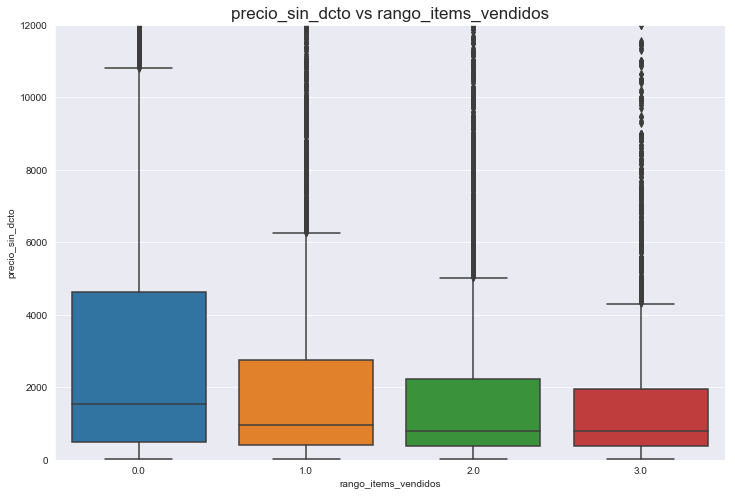

In [121]:
sns.boxplot(data = df_total, x = "rango_items_vendidos", y = variable)
plt.ylim(0,12000)
plt.title(variable + " vs rango_items_vendidos", fontsize=17)
plt.show()

La clase 0 (no vendió items) tiene los precios más altos, y a medida que los precios van bajando sube la cantidad de items vendidos.

### 5.1.2 - precio_con_dcto vs rango_items_vendidos <a id="5.1.2"></a>

In [122]:
variable = "precio_con_dcto"

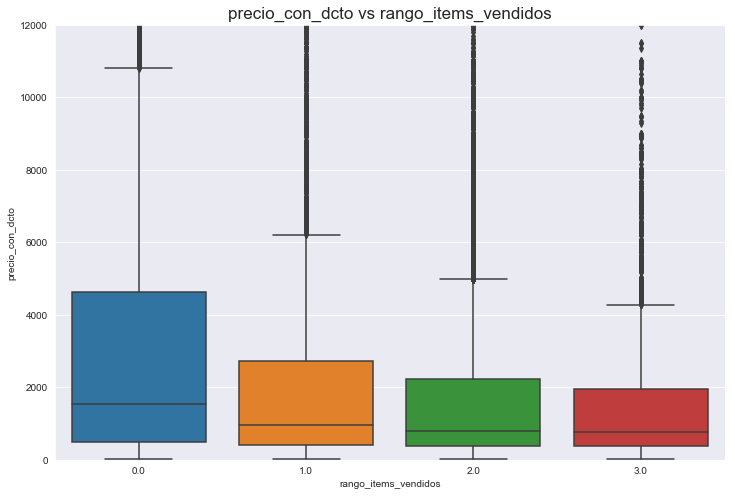

In [123]:
sns.boxplot(data = df_total, x = "rango_items_vendidos", y = variable)
plt.ylim(0,12000)
plt.title(variable + " vs rango_items_vendidos", fontsize=17)
plt.show()

### 5.1.3 - dcto_nominal vs rango_items_vendidos <a id="5.1.3"></a>

In [124]:
variable = "dcto_nominal"

En este caso graficamos sólo los valores mayores a 0, para poder apreciar la distribución del descuento nominal por clase (si no hacemos esto, la mayor parte de la distribución se concentra en 0).

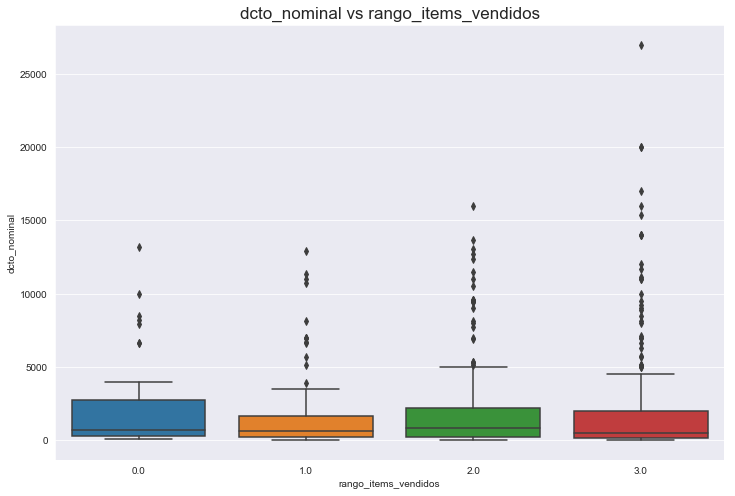

In [125]:
sns.boxplot(data = df_total[df_total[variable] > 0], x = "rango_items_vendidos", y = variable)
#plt.ylim(0,12)
plt.title(variable + " vs rango_items_vendidos", fontsize=17)
#plt.xlabel("x", fontsize=12)
#plt.ylabel(u"x", fontsize=12)
plt.show()

### 5.1.4 - dcto_porcentual vs rango_items_vendidos <a id="5.1.4"></a>

In [126]:
variable = "dcto_porcentual"

En este caso graficamos sólo los valores mayores a 0, para poder apreciar la distribución del descuento porcentual por clase (si no hacemos esto, la mayor parte de la distribución se concentra en 0).

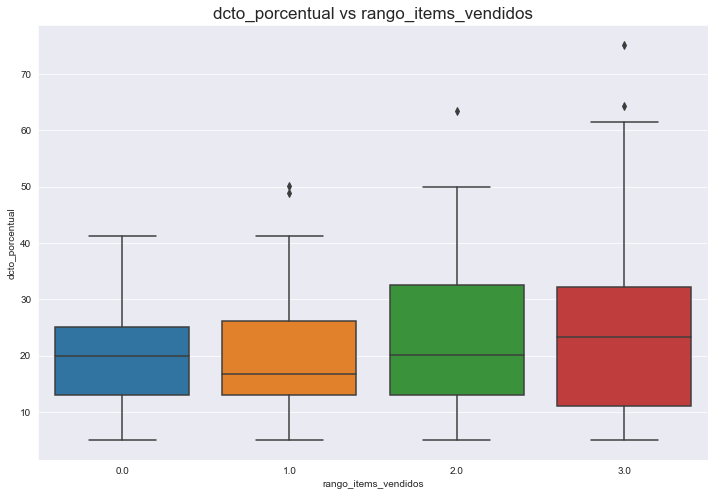

In [127]:
sns.boxplot(data = df_total[df_total[variable] > 0], x = "rango_items_vendidos", y = variable)
#plt.ylim(0,12)
plt.title(variable + " vs rango_items_vendidos", fontsize=17)
#plt.xlabel("x", fontsize=12)
#plt.ylabel(u"x", fontsize=12)
plt.show()

Se ve una diferencia en la mediana de clase 3.

## 5.2 - Variables categóricas <a id="5.2"></a>

## Variables booleanas

### 5.2.1 - tiene_dcto vs rango_items_vendidos <a id="5.2.1"></a>

In [128]:
variable = "tiene_dcto"

#### Ditribución general

In [129]:
df_total[variable].value_counts(normalize = True) * 100

0    98.805785
1     1.194215
Name: tiene_dcto, dtype: float64

Sólo el 1% de las publicaciones tienen descuento!

#### Variable vs target

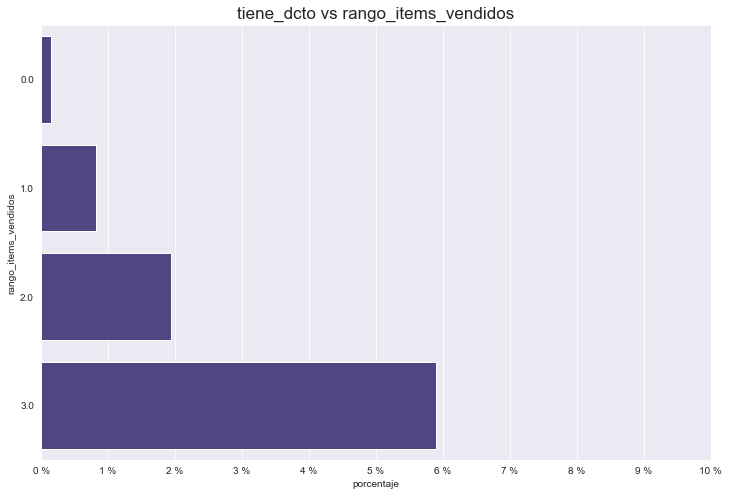

In [130]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 11, 1)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

Vimos anteriormente que sólo el 1% de las publicaciones tienen descuento.

El ~99.8% de las publicaciones que vendieron 0 items no tienen descuento.

Por lo tanto, si una publicacion tiene descuento, casi seguro no es de la clase 0!

### 5.2.2 - tiene_envio_gratis vs rango_items_vendidos <a id="5.2.2"></a>

In [131]:
variable = "tiene_envio_gratis"

#### Ditribución general

In [132]:
df_total[variable].value_counts(normalize = True) * 100

0    70.981604
1    29.018396
Name: tiene_envio_gratis, dtype: float64

#### Variable vs target

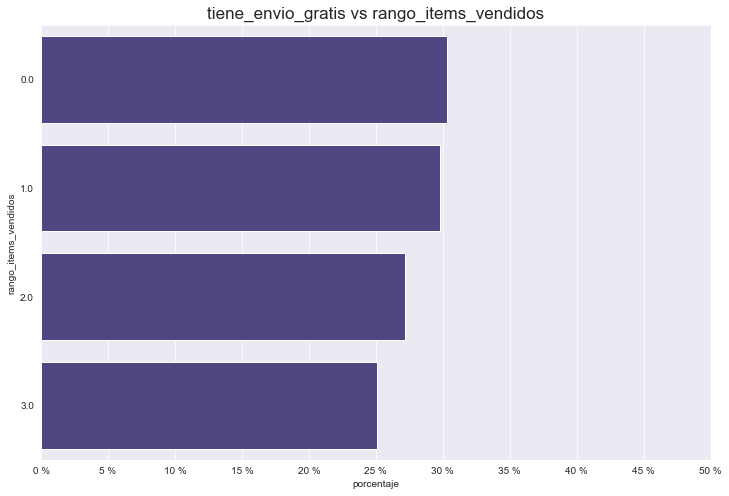

In [133]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 55, 5)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.3 - es_tienda_oficial vs rango_items_vendidos <a id="5.2.3"></a>

In [134]:
variable = "es_tienda_oficial"

#### Ditribución general

In [135]:
df_total[variable].value_counts(normalize = True) * 100

0    98.892072
1     1.107928
Name: es_tienda_oficial, dtype: float64

#### Variable vs target

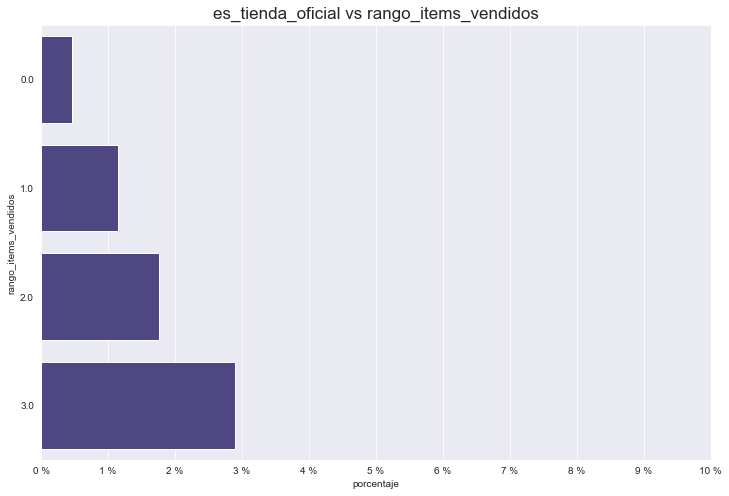

In [136]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 11, 1)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

Si es tienda oficial, casi seguro vende items.

### 5.2.4 - tiene_retiro_local vs rango_items_vendidos <a id="5.2.4"></a>

In [137]:
variable = "tiene_retiro_local"

#### Ditribución general

In [138]:
df_total[variable].value_counts(normalize = True) * 100

0    99.78083
1     0.21917
Name: tiene_retiro_local, dtype: float64

#### Variable vs target

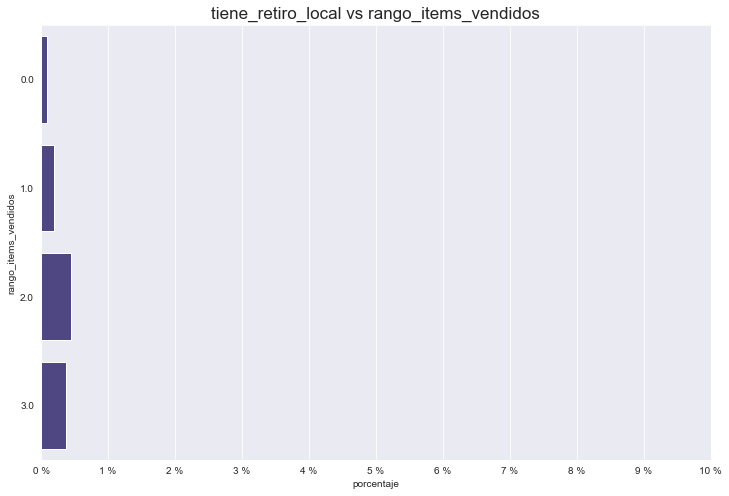

In [139]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 11, 1)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.5 - acepta_mercadopago vs rango_items_vendidos <a id="5.2.5"></a>

In [140]:
variable = "acepta_mercadopago"

#### Ditribución general

In [141]:
df_total[variable].value_counts(normalize = True) * 100

1    100.0
Name: acepta_mercadopago, dtype: float64

#### Todas las publicaciones aceptan MercadoPago, por lo que más adelante vamos a eliminar esta variable.

### 5.2.6 - es_eshop vs rango_items_vendidos <a id="5.2.6"></a>

In [142]:
variable = "es_eshop"

#### Ditribución general

In [143]:
df_total[variable].value_counts(normalize = True) * 100

0    54.236703
1    45.763297
Name: es_eshop, dtype: float64

#### Variable vs target

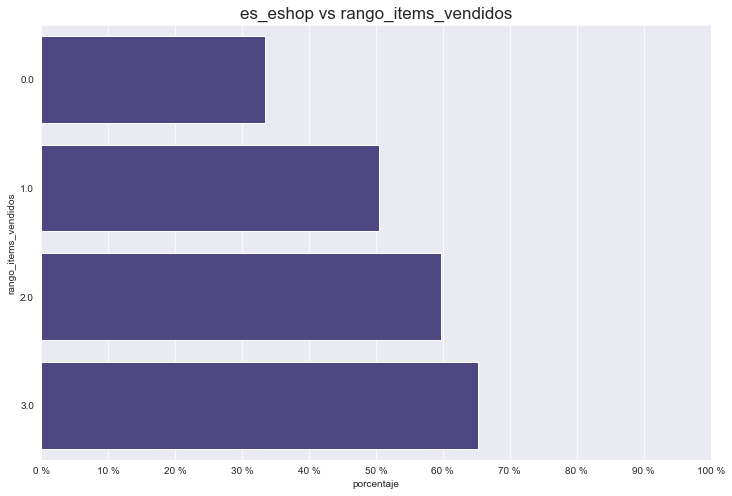

In [144]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.7 - tag_brand_verified vs rango_items_vendidos <a id="5.2.7"></a>

In [145]:
variable = "tag_brand_verified"

#### Cambiamos el tipo a int:

In [146]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [147]:
df_total[variable].value_counts(normalize = True) * 100

0    58.502744
1    41.497256
Name: tag_brand_verified, dtype: float64

#### Variable vs target

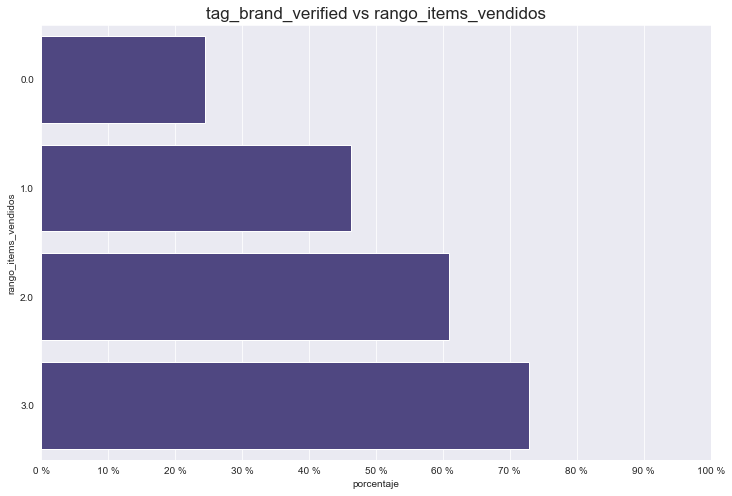

In [148]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.8 - tag_cart_eligible vs rango_items_vendidos <a id="5.2.8"></a>

In [149]:
variable = "tag_cart_eligible"

#### Cambiamos el tipo a int:

In [150]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [151]:
df_total[variable].value_counts(normalize = True) * 100

1    93.642357
0     6.357643
Name: tag_cart_eligible, dtype: float64

#### Variable vs target

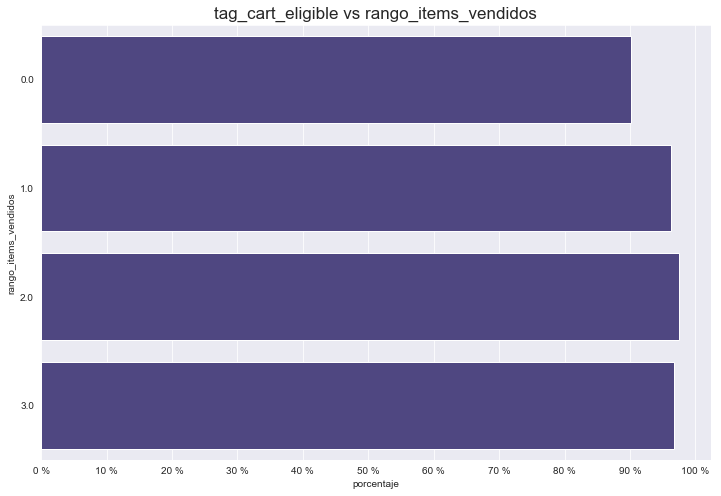

In [152]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.9 - tag_shipping_guaranteed vs rango_items_vendidos <a id="5.2.9"></a>

In [153]:
variable = "tag_shipping_guaranteed"

#### Cambiamos el tipo a int:

In [154]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [155]:
df_total[variable].value_counts(normalize = True) * 100

1    70.391399
0    29.608601
Name: tag_shipping_guaranteed, dtype: float64

#### Variable vs target

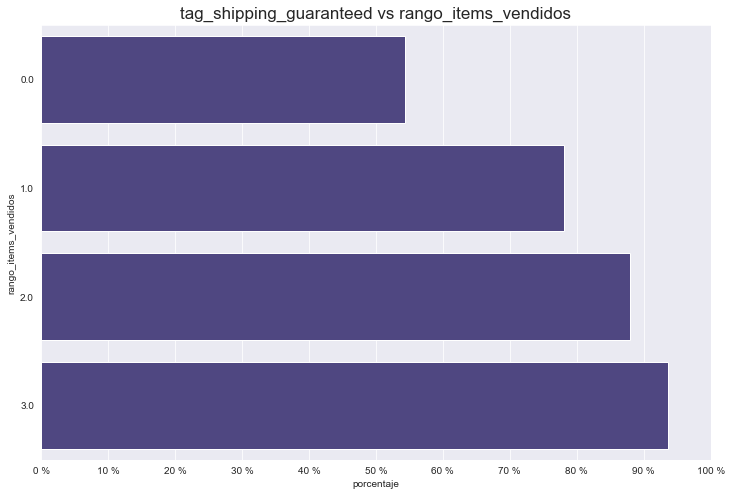

In [156]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.10 - tag_good_quality_picture vs rango_items_vendidos <a id="5.2.10"></a>

In [157]:
variable = "tag_good_quality_picture"

#### Cambiamos el tipo a int:

In [158]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [159]:
df_total[variable].value_counts(normalize = True) * 100

1    51.658441
0    48.341559
Name: tag_good_quality_picture, dtype: float64

#### Variable vs target

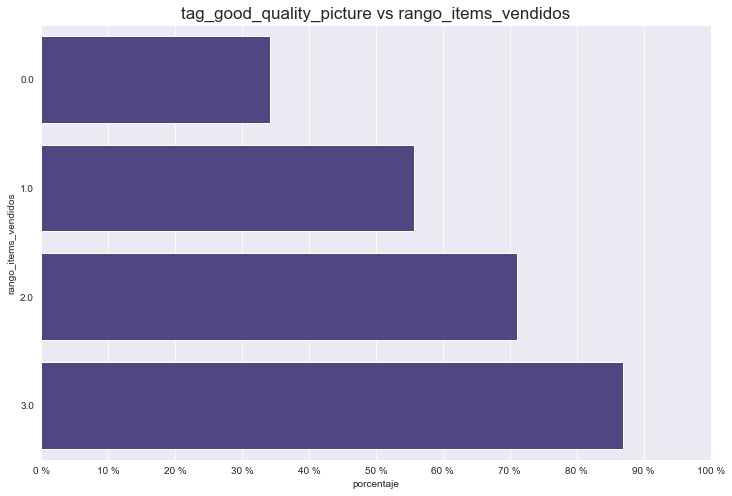

In [160]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.11 - tag_good_quality_thumbnail vs rango_items_vendidos <a id="5.2.11"></a>

In [161]:
variable = "tag_good_quality_thumbnail"

#### Cambiamos el tipo a int:

In [162]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [163]:
df_total[variable].value_counts(normalize = True) * 100

0    58.573499
1    41.426501
Name: tag_good_quality_thumbnail, dtype: float64

#### Variable vs target

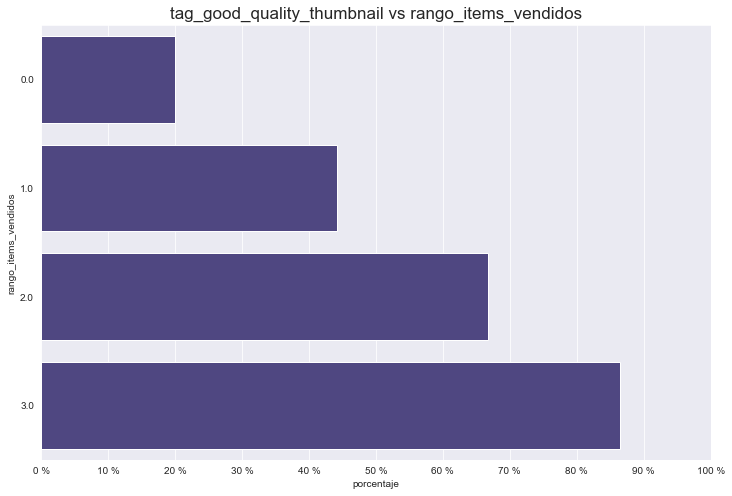

In [164]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.12 - tag_dragged_bids_and_visits vs rango_items_vendidos <a id="5.2.12"></a>

In [165]:
variable = "tag_dragged_bids_and_visits"

#### Cambiamos el tipo a int:

In [166]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [167]:
df_total[variable].value_counts(normalize = True) * 100

0    90.755186
1     9.244814
Name: tag_dragged_bids_and_visits, dtype: float64

#### Variable vs target

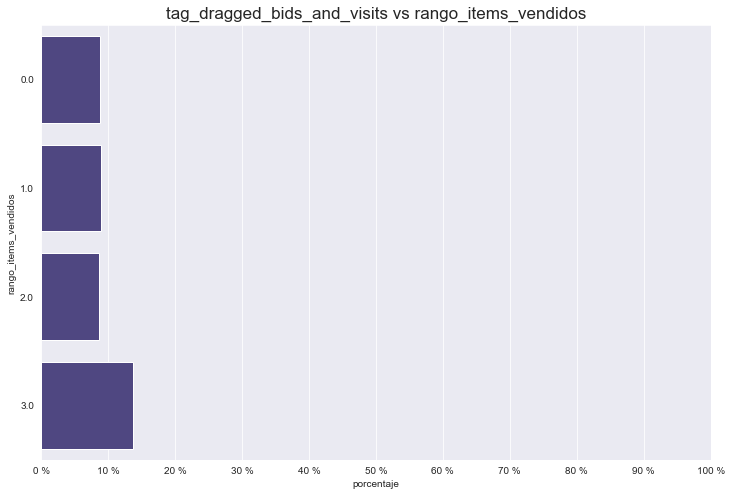

In [168]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.13 - tag_loyalty_discount_eligible vs rango_items_vendidos <a id="5.2.13"></a>

In [169]:
variable = "tag_loyalty_discount_eligible"

#### Cambiamos el tipo a int:

In [170]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [171]:
df_total[variable].value_counts(normalize = True) * 100

0    87.697166
1    12.302834
Name: tag_loyalty_discount_eligible, dtype: float64

#### Variable vs target

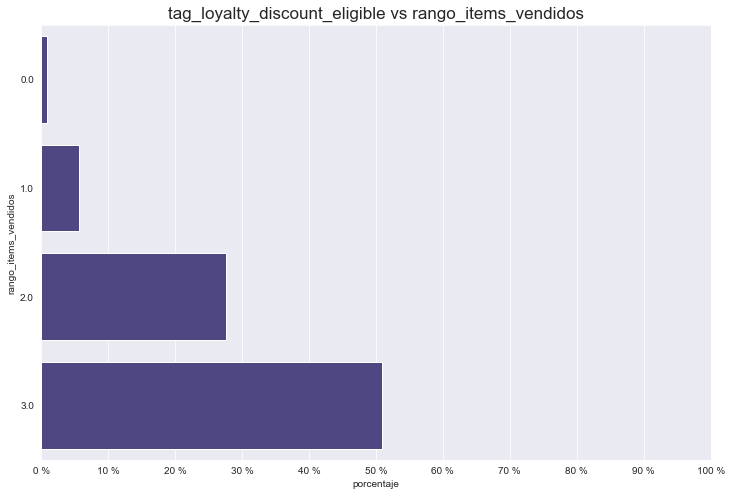

In [172]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.14 - tag_extended_warranty_eligible vs rango_items_vendidos <a id="5.2.14"></a>

In [173]:
variable = "tag_extended_warranty_eligible"

#### Cambiamos el tipo a int:

In [174]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [175]:
df_total[variable].value_counts(normalize = True) * 100

0    98.213854
1     1.786146
Name: tag_extended_warranty_eligible, dtype: float64

#### Variable vs target

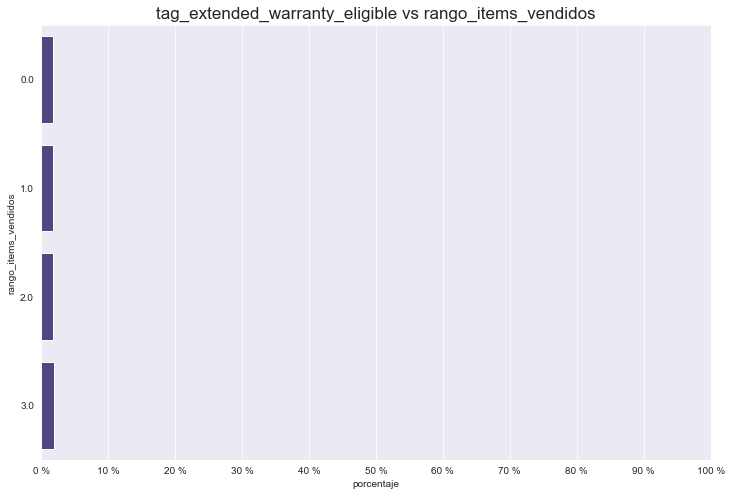

In [176]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.15 - tag_incomplete_technical_specs vs rango_items_vendidos <a id="5.2.15"></a>

In [177]:
variable = "tag_incomplete_technical_specs"

#### Cambiamos el tipo a int:

In [178]:
df_total = df_total.astype({variable: "int"})

#### Ditribución general

In [179]:
df_total[variable].value_counts(normalize = True) * 100

0    90.489421
1     9.510579
Name: tag_incomplete_technical_specs, dtype: float64

#### Variable vs target

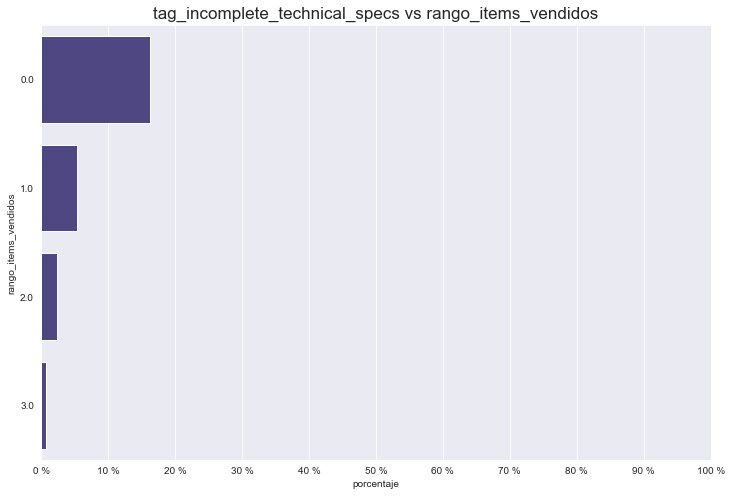

In [180]:
df_aux = df_total.groupby(["rango_items_vendidos"])[variable].mean() * 100
df_aux = pd.DataFrame(df_aux).reset_index()
df_aux.rename(columns = {variable:'porcentaje'}, inplace = True)
df_aux.sort_values("porcentaje", ascending = False, inplace = True)

sns.barplot(data = df_aux, x = "porcentaje", y = "rango_items_vendidos", 
            color = "darkslateblue", orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.16 - modo_compra vs rango_items_vendidos <a id="5.2.16"></a>

In [181]:
variable = "modo_compra"

#### Ditribución general

In [182]:
df_total[variable].value_counts(normalize = True) * 100

buy_it_now    100.0
Name: modo_compra, dtype: float64

#### Todas las publicaciones tienen el mismo modo de compra, por lo que más adelante vamos a eliminar esta variable.

## Más de dos categorías

### 5.2.17 - condicion vs rango_items_vendidos <a id="5.2.17"></a>

In [183]:
variable = "condicion"

#### Ditribución general

In [184]:
df_total[variable].value_counts(normalize = True) * 100

new      84.884203
used     14.948400
other     0.167397
Name: condicion, dtype: float64

#### Variable vs target

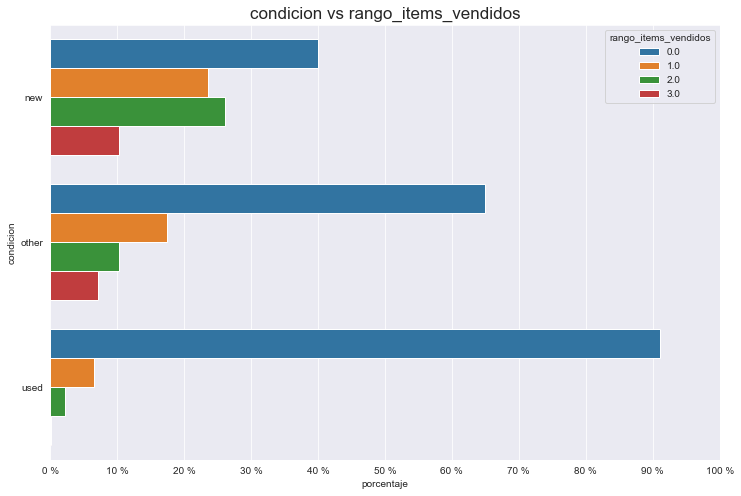

In [185]:
df_aux = (df_total.groupby([variable])["rango_items_vendidos"].value_counts(normalize = True) * 100).to_frame('porcentaje')
df_aux = pd.DataFrame(df_aux).reset_index()

sns.barplot(data = df_aux, x = "porcentaje", y = variable, hue = "rango_items_vendidos", 
            orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

El ~15% de las publicaciones son de items usados. De esas publicaciones, el 90% no venden items!

(Con lo cual, exagerando: usado -> clase 0). (Y lo bueno es que hay un buen porcentaje de publicaciones de items usados!)

### 5.2.18 - rango_stock vs rango_items_vendidos <a id="5.2.18"></a>

In [186]:
variable = "rango_stock"

#### Ditribución general

In [187]:
df_total[variable].value_counts(normalize = True) * 100

0.0    79.936493
1.0     7.192904
6.0     4.545611
8.0     3.201256
7.0     1.696407
5.0     1.309840
3.0     0.899113
2.0     0.892210
4.0     0.326166
Name: rango_stock, dtype: float64

#### Variable vs target

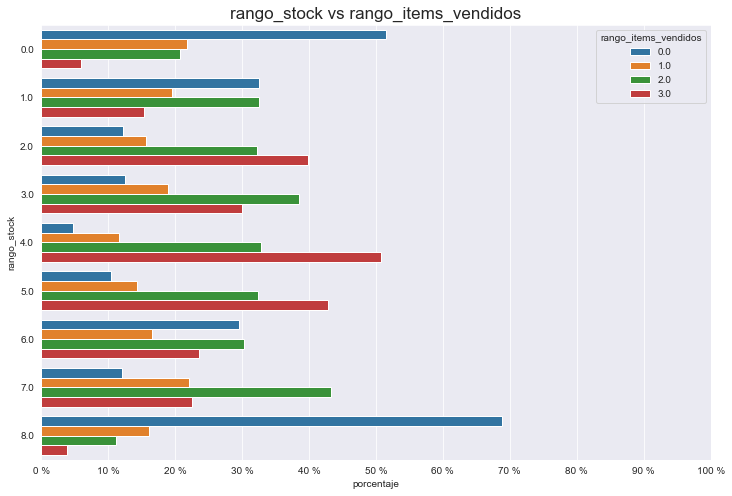

In [188]:
df_aux = (df_total.groupby([variable])["rango_items_vendidos"].value_counts(normalize = True) * 100).to_frame('porcentaje')
df_aux = pd.DataFrame(df_aux).reset_index()

sns.barplot(data = df_aux, x = "porcentaje", y = variable, hue = "rango_items_vendidos", 
            orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

El 50% de las publicaciones de la clase 0 de stock venden 0 items (y son el 80% de las publicaciones totales).

El 70% de las publicaciones de la clase 8 de stock venden 0 items. (Qué raro que tengan tanto stock y vendan tan poco!)

El 50% de las publicaciones de la clase 4 de stock caen en la clase 3 de items vendidos.

### 5.2.19 - zona_agrupada vs rango_items_vendidos <a id="5.2.19"></a>

In [189]:
variable = "zona_agrupada"

#### Ditribución general

In [190]:
df_total[variable].value_counts(normalize = True) * 100

Capital Federal    61.990474
Buenos Aires       25.589342
Córdoba             4.956339
Santa Fe            4.008905
otro                2.731854
Mendoza             0.723087
Name: zona_agrupada, dtype: float64

#### Variable vs target

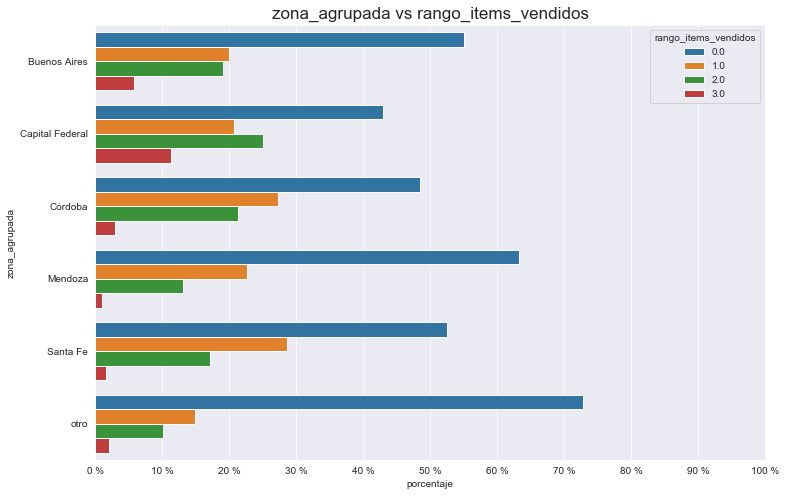

In [191]:
df_aux = (df_total.groupby([variable])["rango_items_vendidos"].value_counts(normalize = True) * 100).to_frame('porcentaje')
df_aux = pd.DataFrame(df_aux).reset_index()

sns.barplot(data = df_aux, x = "porcentaje", y = variable, hue = "rango_items_vendidos", 
            orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.20 - status_vendedor vs rango_items_vendidos <a id="5.2.20"></a>

In [192]:
variable = "status_vendedor"

#### Ditribución general

In [193]:
df_total[variable].value_counts(normalize = True) * 100

sin_status    55.132365
platinum      24.655714
gold          12.271770
silver         7.940151
Name: status_vendedor, dtype: float64

#### Variable vs target

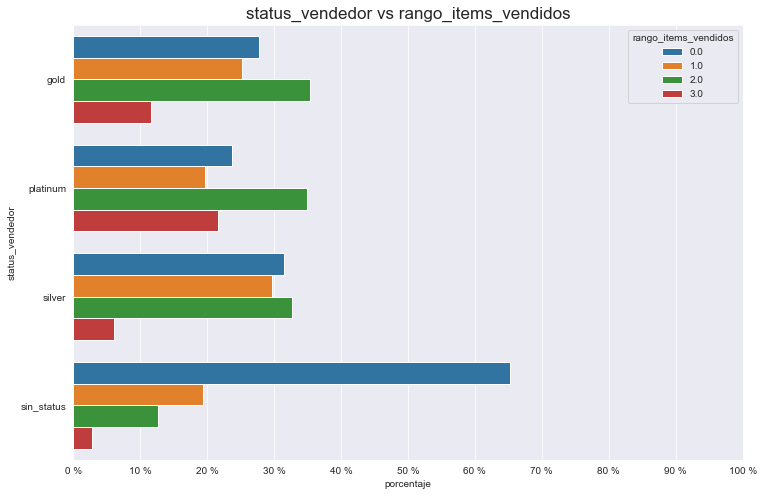

In [194]:
df_aux = (df_total.groupby([variable])["rango_items_vendidos"].value_counts(normalize = True) * 100).to_frame('porcentaje')
df_aux = pd.DataFrame(df_aux).reset_index()

sns.barplot(data = df_aux, x = "porcentaje", y = variable, hue = "rango_items_vendidos", 
            orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

### 5.2.21 - listing_type_id vs rango_items_vendidos <a id="5.2.21"></a>

In [195]:
variable = "listing_type_id"

#### Ditribución general

In [196]:
df_total[variable].value_counts(normalize = True) * 100

gold_special    83.897077
gold_pro        12.335623
free             3.767301
Name: listing_type_id, dtype: float64

#### Variable vs target

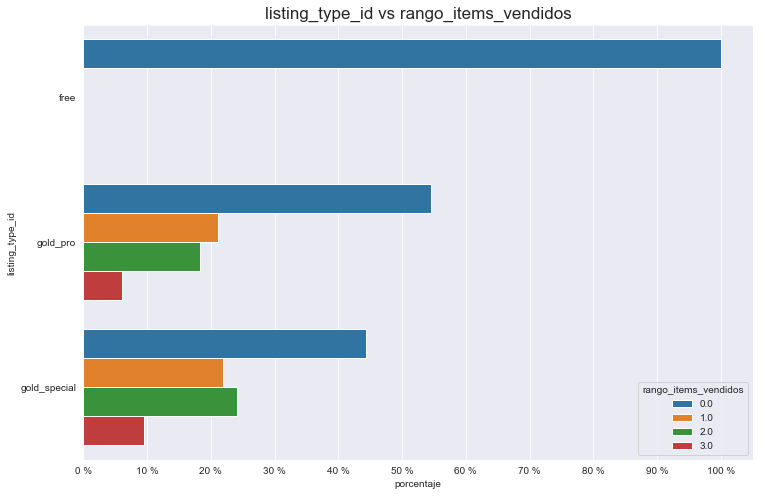

In [197]:
df_aux = (df_total.groupby([variable])["rango_items_vendidos"].value_counts(normalize = True) * 100).to_frame('porcentaje')
df_aux = pd.DataFrame(df_aux).reset_index()

sns.barplot(data = df_aux, x = "porcentaje", y = variable, hue = "rango_items_vendidos", 
            orient = "h")

xticks = np.arange(0, 110, 10)
plt.xticks(xticks, [str(int(item)) + " %" for item in xticks])
plt.title(variable + " vs rango_items_vendidos", fontsize=17)

plt.show()

Todos los free son de la clase 0!

# 6 - Encode de variables <a id="6"></a>

In [198]:
columnas_de_interes = ["subcategoria",
                      'precio_con_dcto', "precio_sin_dcto", 'tiene_dcto', "dcto_nominal", "dcto_porcentual",
                      'rango_items_vendidos', "rango_stock",
                      'zona_agrupada',
                      'tiene_envio_gratis', 'es_tienda_oficial', 'tiene_retiro_local',
                      'condicion', "status_vendedor",
                       "listing_type_id",
                       "es_eshop", "tag_brand_verified", "tag_cart_eligible", "tag_shipping_guaranteed",
                       "tag_good_quality_picture", "tag_good_quality_thumbnail", 'tag_dragged_bids_and_visits',
                       "tag_loyalty_discount_eligible", "tag_extended_warranty_eligible", "tag_incomplete_technical_specs"
                      ]

In [199]:
df_total = df_total[columnas_de_interes]

In [200]:
df_total = pd.get_dummies(df_total)

In [201]:
df_total.dtypes

precio_con_dcto                                float64
precio_sin_dcto                                float64
tiene_dcto                                       int32
dcto_nominal                                   float64
dcto_porcentual                                float64
rango_items_vendidos                           float64
rango_stock                                    float64
tiene_envio_gratis                               int32
es_tienda_oficial                                int32
tiene_retiro_local                               int32
es_eshop                                         int32
tag_brand_verified                               int32
tag_cart_eligible                                int32
tag_shipping_guaranteed                          int32
tag_good_quality_picture                         int32
tag_good_quality_thumbnail                       int32
tag_dragged_bids_and_visits                      int32
tag_loyalty_discount_eligible                    int32
tag_extend

#### Drop de variables dummies

In [202]:
df_total = df_total.drop(["condicion_other", "condicion_used"], axis = 1)

# 7 - Train-Validation split <a id="7"></a>

#### Distribución de la variable target

In [203]:
df_total["rango_items_vendidos"].value_counts(dropna = False, normalize = True) * 100

0.0    47.694405
2.0    22.510613
1.0    21.016118
3.0     8.778863
Name: rango_items_vendidos, dtype: float64

#### Hacemos el split

In [204]:
X = df_total.drop(columns = ['rango_items_vendidos'], axis = 1)
y = df_total['rango_items_vendidos']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed, stratify = y)

Vamos a usar (X_train, y_train) para entrenar los modelos (usando cross-validation) y (X_val, y_val) como set de validación.

In [205]:
print('X_train Dimension: ', X_train.shape)
print('y_train Dimension: ', y_train.shape)

print('X_val Dimension:   ', X_val.shape)
print('y_val Dimension:   ', y_val.shape)

X_train Dimension:  (43459, 123)
y_train Dimension:  (43459,)
X_val Dimension:    (14487, 123)
y_val Dimension:    (14487,)


# 8 - Métrica de evaluación <a id="8"></a>

Nuestra variable target tiene cuatro clases:

- Clase 0 $\rightarrow$ 0 items vendidos 
- Clase 1 $\rightarrow$ $[1,5]$ items vendidos (poco volumen)
- Clase 2 $\rightarrow$ $[6,50]$ items vendidos (volumen moderado)
- Clase 3 $\rightarrow$ $[50, \infty)$ items vendidos (volumen alto)

Estas clases están desbalanceadas:

In [206]:
y_train.value_counts(normalize=True)

0.0    0.476955
2.0    0.225109
1.0    0.210152
3.0    0.087784
Name: rango_items_vendidos, dtype: float64

Asumiendo que para el negocio las 4 clases son iguales de importantes, vamos a tomar como métrica de evalución el f1 score con average "macro", es decir, el promedio del f1 de cada una de las 4 clases, sin ponderar por el tamaño de cada clase.

A su vez, vamos a considerar precision y recall de cada una de las clases, para poder entender cómo está funcionando nuestro modelo específicamente en cada clase.

# 9 - Construcción de los modelos <a id="9"></a>

## Si no se quiere ejecutar el entrenamiento de los modelos, avanzar directamente a la sección: [10 - Evaluación y resultados](#10)

### Instanciamos los clasificadores

En este caso sólo probé con dos tipos de modelos por una cuestión de tiempo. 

In [207]:
# Random Forest Classifier
rf = RandomForestClassifier()

# Adaboost Classifier'''
abc = AdaBoostClassifier()

### Definimos los hiperparámetros a probar

In [211]:
'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion': ['gini','entropy'],
             'n_estimators': scipy.stats.randint(low = 100, high = 300),
             'max_depth' : list(np.arange(1, 100, 1)) + [None],
             "min_samples_split" : [5, 10, 50, .1, .01, .001], 
             'max_features': ['auto', 'log2'],
             'random_state': [seed],
             "n_jobs": [-1]}

'''For ABC, the following hyperparameters are usually tunned.'''
abc_params = {'n_estimators': scipy.stats.randint(low = 100, high = 300),
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state': [seed]}

### Definimos un diccionario donde guardaremos la información obtenida

In [212]:
dicc_modelos = {"rf":{"objeto":rf, "params":rf_params},
                "abc":{"objeto":abc, "params":abc_params}
               }

### Hacemos el tuneo de los hiperparámetros

In [213]:
t_inicial = time.perf_counter()

for nombre_modelo in dicc_modelos.keys():
    
    print("Entrenando", nombre_modelo, "...")
    modelo = dicc_modelos[nombre_modelo]["objeto"]
    params = dicc_modelos[nombre_modelo]["params"]

    random_search = RandomizedSearchCV(modelo, param_distributions = params, cv = 3, 
                                   n_iter = 100, 
                                   n_jobs = -1, random_state = seed,
                                   return_train_score = True,
                                   scoring = "f1_macro",
                                   verbose = 2
                                  )
    random_search_entrenado = random_search.fit(X_train, y_train)
    dicc_modelos[nombre_modelo]["random_search_entrenado"] = random_search_entrenado
    elapsed_time = time.perf_counter() - t_inicial
    print(nombre_modelo, "entrenado! (Tiempo total transcurrido:", round(elapsed_time / 60, 2), "minutos).")
    print("-"*100)

    del modelo
    del random_search
    del random_search_entrenado

elapsed_time = time.perf_counter() - t_inicial

Entrenando rf ...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.8min finished


rf entrenado! (Entrenado en 13.89 minutos).
----------------------------------------------------------------------------------------------------
Entrenando abc ...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.6min finished


abc entrenado! (Entrenado en 27.75 minutos).
----------------------------------------------------------------------------------------------------


In [214]:
print("Tiempo total de ejecución:", round(elapsed_time / 60, 2), "minutos.")

Tiempo total de ejecución: 27.75 minutos.


Agregamos al diccionario dicc_modelos la información obtenida:

In [215]:
for nombre_modelo in dicc_modelos.keys():
    random_search_entrenado = dicc_modelos[nombre_modelo]["random_search_entrenado"]
    results = pd.DataFrame(random_search_entrenado.cv_results_).sort_values("mean_test_score", ascending = False).head(1)
    mean_test_score = results["mean_test_score"].iloc[0]
    mean_train_score = results["mean_train_score"].iloc[0]
    overfitting = mean_train_score - mean_test_score
    params = results["params"].iloc[0]
    mejor_modelo_entrenado = random_search_entrenado.best_estimator_
    y_pred = mejor_modelo_entrenado.predict(X_val)
    validation_score = f1_score(y_val, y_pred, average = "macro")
    
    dicc_modelos[nombre_modelo]["mean_test_score"] = mean_test_score
    dicc_modelos[nombre_modelo]["mean_train_score"] = mean_train_score
    dicc_modelos[nombre_modelo]["overfitting"] = overfitting
    dicc_modelos[nombre_modelo]["params"] = params
    dicc_modelos[nombre_modelo]["mejor_modelo_entrenado"] = mejor_modelo_entrenado
    dicc_modelos[nombre_modelo]["validation_score"] = validation_score

### Resultados del tuneo

In [216]:
df_resultados_tuneo = generar_df_resultados_tuneo(dicc_modelos)

In [217]:
df_resultados_tuneo

,nombre_modelo,validation_score,mean_test_score,mean_train_score,overfitting,params
0,rf,0.577464,0.569834,0.833217,0.263382,"{'criterion': 'gini', 'max_depth': 73, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 231, 'n_jobs': -1, 'random_state': 42}"
1,abc,0.529782,0.523546,0.529794,0.006248,"{'learning_rate': 1.5, 'n_estimators': 242, 'random_state': 42}"


### Mejor modelo obtenido

In [218]:
nombre_mejor_modelo = df_resultados_tuneo.sort_values("validation_score", ascending = False)["nombre_modelo"].iloc[0]
mejor_modelo = dicc_modelos[nombre_mejor_modelo]["mejor_modelo_entrenado"]

### Guardamos el mejor modelo en un pickle

In [219]:
pickle.dump(mejor_modelo, open('mejor_modelo.sav', 'wb'))

# 10 - Evaluación (sobre el dataset de validación) y resultados <a id="10"></a>

### Cargamos el mejor modelo:

In [220]:
mejor_modelo = pickle.load(open('mejor_modelo.sav', 'rb'))

### Entrenamos el modelo sobre el dataset de entrenamiento completo.

(No sé si esto es necesario, creo que RandomizedSearchCV ya deja entrenado al mejor modelo con el dataset completo).

In [221]:
mejor_modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=73, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=231, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Hacemos las predicciones sobre el dataset de validación

In [222]:
y_pred = mejor_modelo.predict(X_val)

## 10.1 - Evaluación del mejor modelo obtenido <a id="10.1"></a>

In [223]:
df_metricas = generar_df_metricas(y_val, y_pred, [0,1,2,3])

score = f1_score(y_val, y_pred, average = "macro")
bold("F1 macro: " + str(round(score,3)))

score = f1_score(y_val, y_pred, average = "micro")
bold("F1 micro: " + str(round(score,3)))

df_metricas.sort_values(["clase"], ascending = True)

F1 macro: 0.577

F1 micro: 0.669

,clase,precision,recall,f1,cantidad_casos,porcentaje_casos
0,0,0.790228,0.894196,0.839003,6909,47.69
1,1,0.465894,0.343186,0.395234,3045,21.02
2,2,0.540891,0.588163,0.563538,3261,22.51
3,3,0.626136,0.433176,0.512082,1272,8.78


## 10.2 - Definición y evaluación del modelo baseline <a id="10.2"></a>

#### Definición

Como baseline, vamos a usar un modelo random que siga la distribución de y_train. 

Es decir, dada una publicación, el modelo baseline va a predecir una categoría al azar (clase 0 con ~0.47 probabilidad, clase 1 con ~0.22 probabilidad, clase 2 con ~0.21 probabilidad, clase 3 con ~0.09 probabilidad).

#### Evaluación

In [224]:
#y_pred_random_model = pd.Series(np.random.randint(low = 0, high = 4, size = len(y_val)))
y_pred_random_model = y_train.sample(random_state = seed, n = len(y_val), replace = True)
df_metricas_random_model = generar_df_metricas(y_val, y_pred_random_model, [0,1,2,3])

score = f1_score(y_val, y_pred_random_model, average = "macro")
bold("F1 macro: " + str(round(score,3)))

score = f1_score(y_val, y_pred_random_model, average = "micro")
bold("F1 micro: " + str(round(score,3)))

df_metricas_random_model.sort_values(["clase"], ascending = True)

F1 macro: 0.248

F1 micro: 0.328

,clase,precision,recall,f1,cantidad_casos,porcentaje_casos
0,0,0.473037,0.473585,0.473311,6909,47.69
1,1,0.209521,0.205255,0.207366,3045,21.02
2,2,0.223998,0.227844,0.225905,3261,22.51
3,3,0.087402,0.087264,0.087333,1272,8.78


## 10.3 - Mejor modelo obtenido versus modelo baseline <a id="10.3"></a>

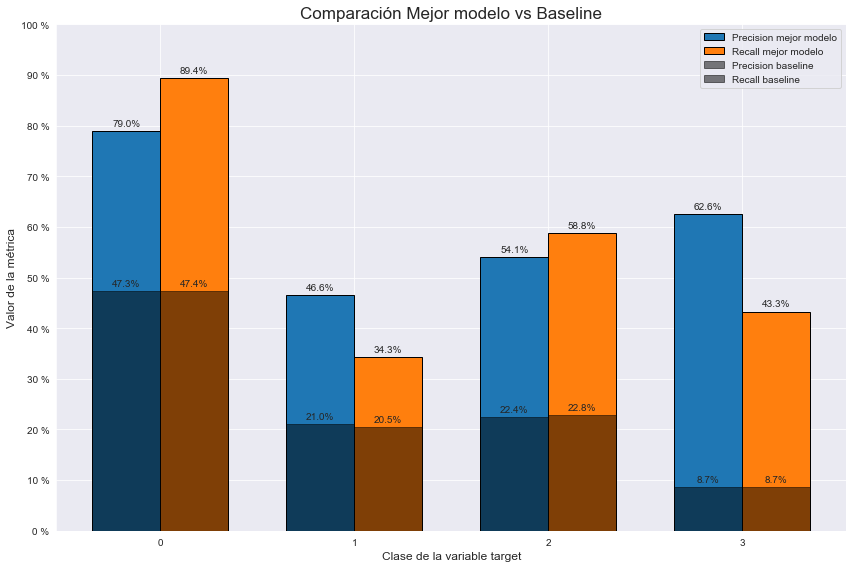

In [225]:
graficar_comparacion_modelos(y_val, y_pred_random_model, y_val, y_pred, [0,1,2,3])

## 10.4 - Feature importances <a id="10.4"></a>

In [226]:
df_feature_importances = generar_df_feature_importances(mejor_modelo, X_train.columns)

In [227]:
df_feature_importances

,feature,importance_std,importance_percentage,accumulated_importance_percentage
1,precio_sin_dcto,1.526557e-16,10.531455,10.531455
0,precio_con_dcto,5.828671e-16,10.426212,20.957667
16,tag_loyalty_discount_eligible,1.249001e-16,6.592627,27.550295
14,tag_good_quality_thumbnail,1.804112e-16,6.131694,33.681989
119,status_vendedor_sin_status,1.526557e-16,4.664913,38.346902
115,condicion_new,0.000000e+00,3.932670,42.279572
5,rango_stock,4.857226e-17,3.482387,45.761959
12,tag_shipping_guaranteed,0.000000e+00,3.102581,48.864540
10,tag_brand_verified,5.204170e-17,2.620205,51.484745
13,tag_good_quality_picture,2.775558e-17,2.110611,53.595356


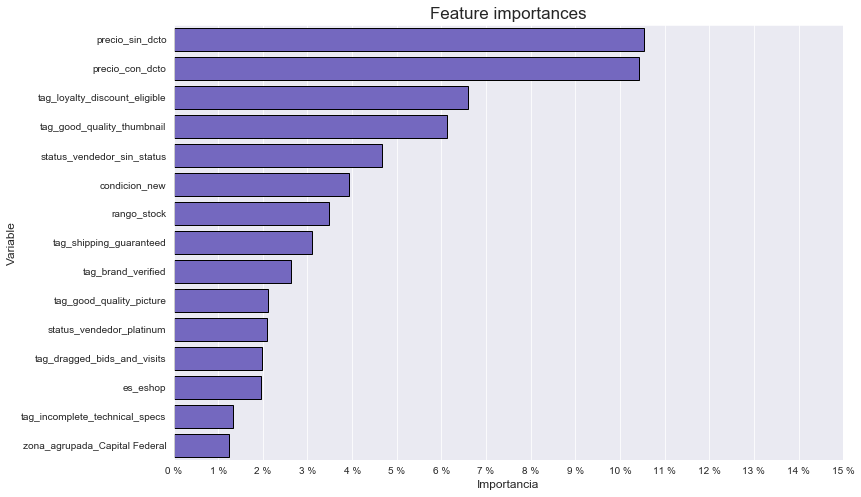

In [228]:
graficar_feature_importances(df_feature_importances, 15)

# 11 - Próximos pasos / ideas de mejoras <a id="11"></a>

Teniendo en cuenta que este es un notebook que hice en 3 días, es razonable que queden mútliples puntos de mejora. A mí se me ocurren:

- Armar un dataset más grande y representativo (recordar que en este dataset sólo tenemos 1000 publicaciones por subcategoría hoja!)
- Agregar más variables
- Hacer under o over sampling para balancear las clases y ver si eso performa mejor
- Armar un heatmap con las correlaciones entre las variables en el caso de querer hacer Feature Selection
- Probar con diversos modelos
- Probar de hacer ensamble de modelos: 
    - Hard voting
    - Soft Voting
    - Bagging
    - Boosting
    - Blending
    - Stacking
- Hacer análisis multivariado vs la variable target para tratar de entender las mejores variables predictoras
- Experimentar considerando publicaciones como outliers para ver si mejora el score
- Binear las variables de precio para ver si mejora el score
- Hacer las learning curves para estudiar el over-under fitting